In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', encoding='windows-1251')

In [7]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [8]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
user_data.isna().value_counts()

client  premium  age  
False   False    False    2954
dtype: int64

In [4]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', encoding='windows-1251')

In [6]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [13]:
logs.isnull().describe()

,client,success,platform,time
count,4500,4500,4500,4500
unique,1,1,1,1
top,False,False,False,False
freq,4500,4500,4500,4500


In [14]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [15]:
logs.platform.nunique()

3

In [26]:
sorted(list(logs.groupby('client', as_index=False) \
     .agg({'success': 'sum'}).sort_values(by='success', ascending=False).head(9)['client']))

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [31]:
user_data.merge(logs).query('premium == True') \
        .groupby('platform') \
        .agg({'success': 'sum'})

,success
platform,
computer,108
phone,177
tablet,18


In [38]:
import seaborn as sns
%matplotlib inline


C:\Users\DarkstalkeR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DarkstalkeR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

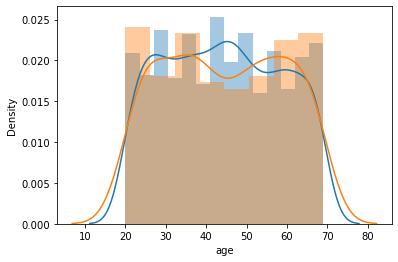

In [46]:
sns.distplot(user_data.query('premium == False')['age'])
sns.distplot(user_data.query('premium == True')['age'])

In [47]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


<AxesSubplot:xlabel='success', ylabel='client'>

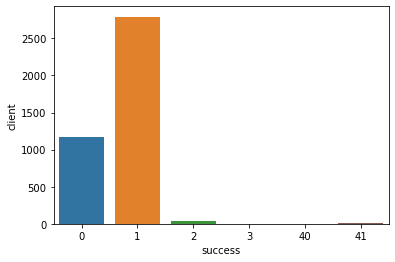

In [59]:
sns.barplot(x='success', y='client', data=logs.groupby('client', as_index=False) \
             .agg({'success': 'sum'}).groupby('success', as_index=False) \
             .agg({'client': 'count'}))

In [77]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='count'>

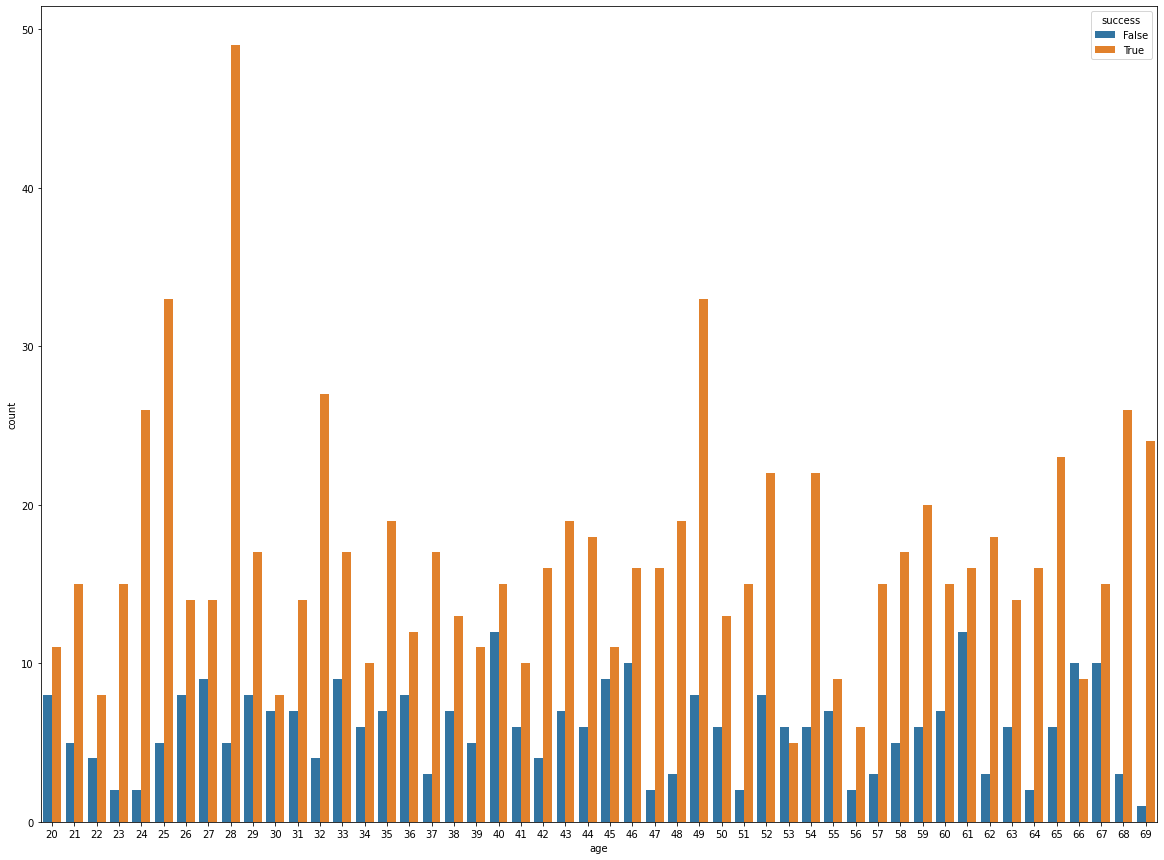

In [85]:
plt.figure(figsize=(20, 15))
sns.countplot( x='age', hue='success', data=user_data.merge(logs, on='client') \
              .query('platform == "computer"') \
             )


In [66]:
user_data.merge(logs, on='client').query('platform == "computer"').groupby('age', as_index=False).agg({'success': 'sum'})

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17
